In [58]:
import numpy as np
import os
import copy
import matplotlib.pyplot as plt

from skimage.io import imread

from spice.dynamic_pixel import get_merged_r_image
from pypvcell.fom import ff
from pypvcell.solarcell import SQCell,MJCell
from pypvcell.illumination import load_astm

In [59]:
mask_filepath='./masks_sq.png'

In [60]:
original_mask=imread(mask_filepath,as_grey=True)

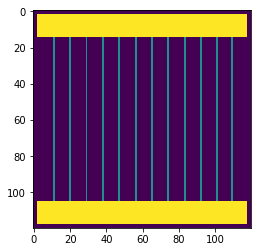

In [61]:
plt.imshow(original_mask)

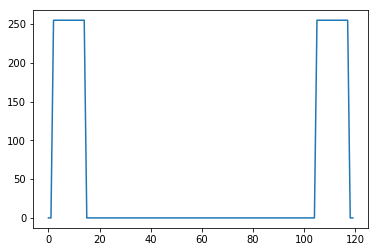

In [62]:
plt.plot(original_mask[:,10])

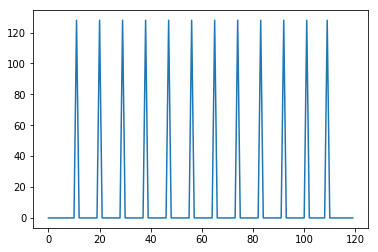

In [63]:
plt.plot(original_mask[60,:])

In [64]:
print(np.max(original_mask[60,:]))

128


In [65]:
def add_grid(image,N,finger_width,margin_c):
    
    margin_c_p=int(image.shape[1]*margin_c)+1
    
    lr=image.shape[0]
    lc=image.shape[1]
    
    pitch=lc//N
    
    remainder=lc%N
    
    finger_pos=np.linspace(pitch+remainder//2,lc-pitch-remainder//2,num=N,dtype=np.uint)
    for pos in finger_pos:        
        image[margin_c_p:lr-margin_c_p,pos-finger_width//2:pos+finger_width//2]=124
        
    return image

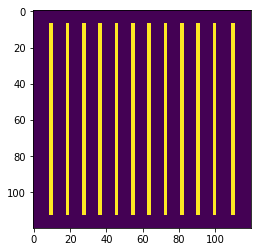

In [66]:
test_image=np.zeros_like(original_mask,dtype=np.uint8)
test_image=add_grid(test_image,12,2,0.05)
plt.imshow(test_image)

In [67]:
def add_busbar(image,bus_width,margin_r,margin_c):
    
    lr=image.shape[0]
    lc=image.shape[1]
    
    bus_width_p=int(lr*bus_width)
    margin_r_p=int(image.shape[0]*margin_r)
    margin_c_p=int(image.shape[1]*margin_c)
    
    image[margin_r_p:margin_r_p+bus_width_p,margin_c_p:lc-margin_c_p]=255
    
    image[lr-margin_r_p-bus_width_p:lr-margin_r_p,margin_c_p:lc-margin_c_p]=255
    
    return image

In [68]:
test_image=np.zeros_like(original_mask,dtype=np.uint8)
test_image=add_busbar(test_image,bus_width=0.1,margin_c=0.05,margin_r=0.05)

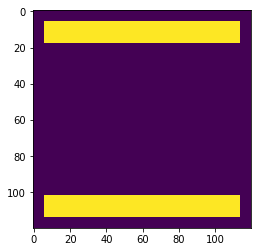

In [69]:
plt.imshow(test_image)

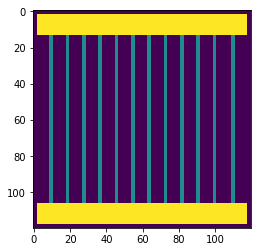

In [71]:
test_image=np.zeros_like(original_mask,dtype=np.uint8)
test_image=add_grid(test_image,12,2,0.02)
test_image=add_busbar(test_image,bus_width=0.1,margin_c=0.02,margin_r=0.02)

plt.imshow(test_image)